In [1]:
from pycocotools.coco import COCO
import json

In [2]:
# Đường dẫn đến tập tin annotation COCO (ví dụ: "annotations/instances_val2017.json")
coco_annotation_path = "E:/Download/annotations/instances_val2017.json"
coco = COCO(coco_annotation_path)

loading annotations into memory...
Done (t=1.85s)
creating index...
index created!


In [3]:
# Lấy các categories (danh mục đối tượng)
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]

In [4]:
# In ra danh sách category_names
print(category_names)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


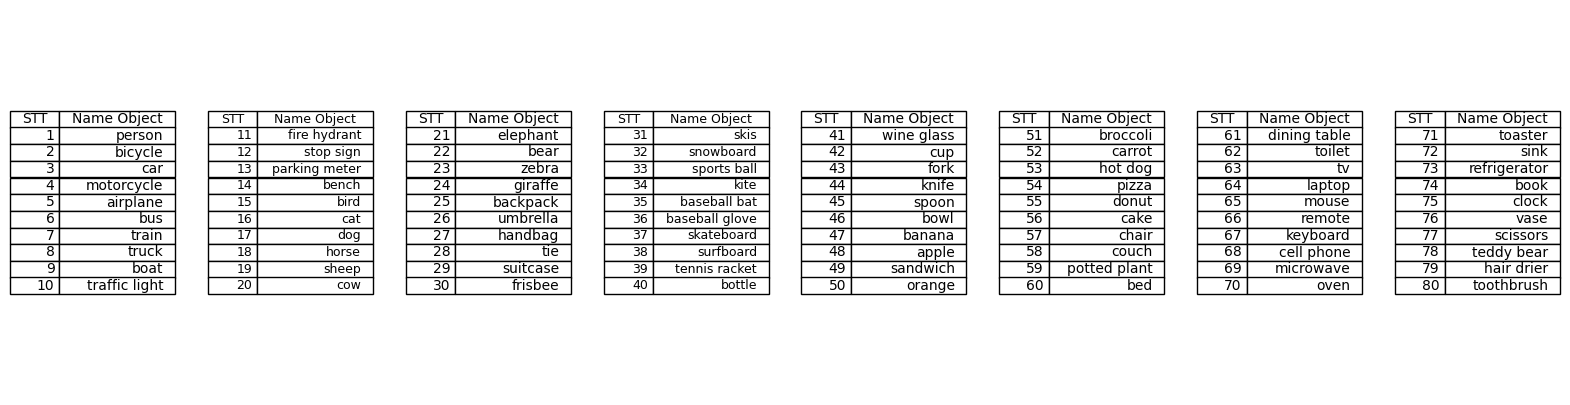

In [5]:
import pandas as pd
from IPython.display import display

# Tạo bảng và hiển thị
object_list = pd.DataFrame(category_names, columns=["Name Object"])
object_list.insert(0, "STT", range(1, len(object_list) + 1))

# Chia bảng thành các phần nhỏ hơn với 10 hàng mỗi bảng
num_parts = 8
rows_per_part = 10
parts = []

# Chia thành các phần nhỏ
for i in range(num_parts):
    start_idx = i * rows_per_part
    end_idx = start_idx + rows_per_part
    part = object_list[start_idx:end_idx]
    parts.append(part)

# Hiển thị các bảng theo hàng ngang
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=num_parts, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.axis('tight')
    ax.axis('off')
    # Điều chỉnh chiều rộng cột (cột "STT" sẽ nhỏ hơn)
    colWidths = [0.3, 0.7]  # STT cột chiếm 30%, các cột còn lại chiếm 70%
    
    ax.table(cellText=parts[i].values, colLabels=parts[i].columns, loc='center', colWidths=colWidths)

plt.show()

In [6]:
# Lấy các annotations
image_ids = coco.getImgIds()
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_ids))

In [7]:
# In một ví dụ về annotations
print(annotations[0])

{'segmentation': [[224.24, 297.18, 228.29, 297.18, 234.91, 298.29, 243.0, 297.55, 249.25, 296.45, 252.19, 294.98, 256.61, 292.4, 254.4, 264.08, 251.83, 262.61, 241.53, 260.04, 235.27, 259.67, 230.49, 259.67, 233.44, 255.25, 237.48, 250.47, 237.85, 243.85, 237.11, 240.54, 234.17, 242.01, 228.65, 249.37, 224.24, 255.62, 220.93, 262.61, 218.36, 267.39, 217.62, 268.5, 218.72, 295.71, 225.34, 297.55]], 'area': 1481.3806499999994, 'iscrowd': 0, 'image_id': 397133, 'bbox': [217.62, 240.54, 38.99, 57.75], 'category_id': 44, 'id': 82445}


In [8]:
import detectron2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo

In [9]:
# Cấu hình cho Predictors của Detectron2
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Ngưỡng để lọc các đối tượng
cfg.MODEL.DEVICE = "cpu"  # Sử dụng CPU thay vì GPU

predictor = DefaultPredictor(cfg)

In [8]:
import cv2
import os

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

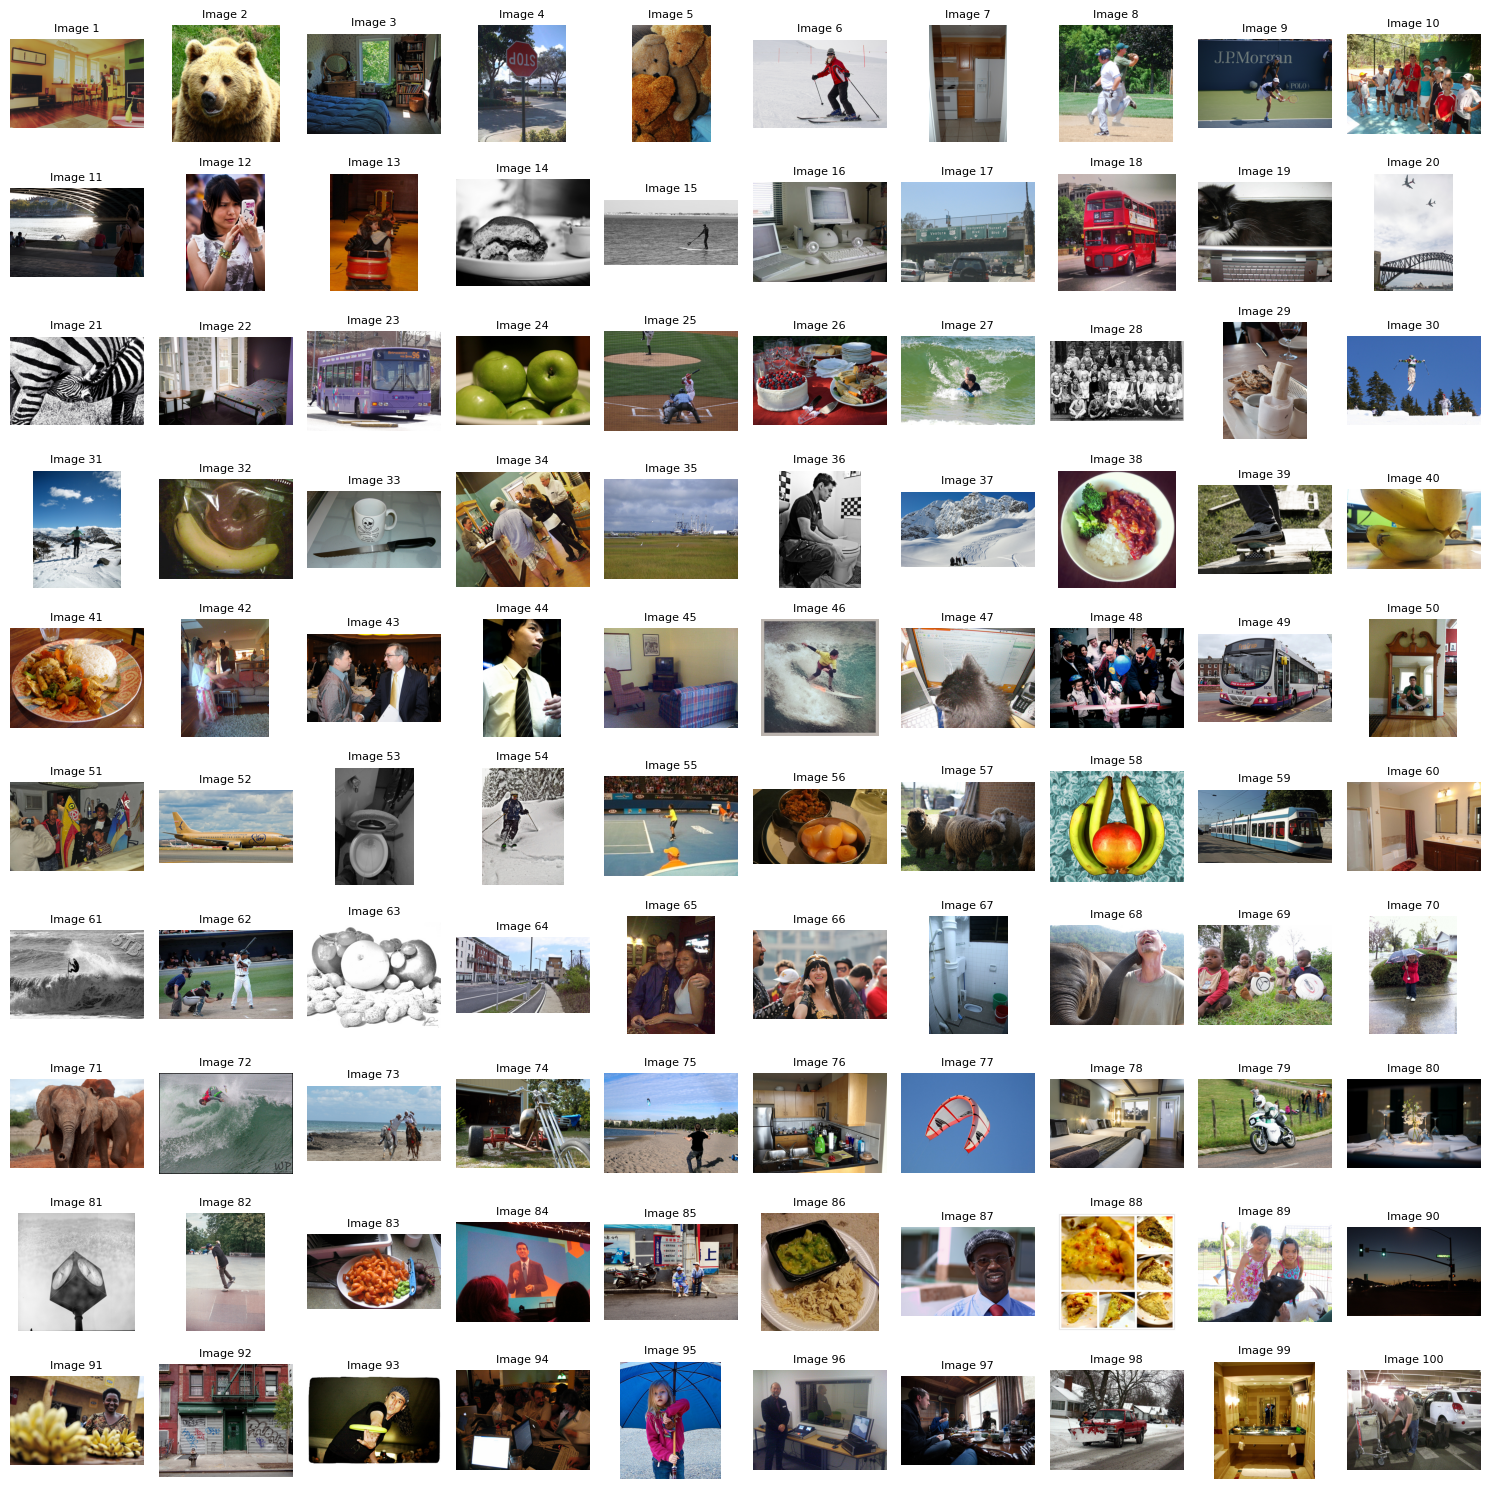

In [13]:
# Thư mục chứa ảnh
image_folder = "E:/Download/val2017/"

# Lấy danh sách tất cả ảnh trong thư mục
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".jpg")]

# Chỉ lấy 100 ảnh đầu tiên
image_files = image_files[:100]

# Tạo Figure với lưới 10x10
fig, axes = plt.subplots(10, 10, figsize=(15, 15))

# Duyệt qua từng ảnh và hiển thị
for idx, image_path in enumerate(image_files):
    row = idx // 10  # Dòng hiện tại
    col = idx % 10   # Cột hiện tại

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển BGR thành RGB để hiển thị đúng màu

    axes[row, col].imshow(image)
    axes[row, col].axis("off")  # Ẩn trục tọa độ
    axes[row, col].set_title(f"Image {idx+1}", fontsize=8)  # Hiển thị số thứ tự

# Hiển thị toàn bộ lưới ảnh
plt.tight_layout()
plt.show()

In [10]:
import random

In [15]:
# Lưu kết quả nhận diện tất cả 100 ảnh
detected_objects = {}

In [16]:
# Nhận diện đối tượng trên 100 ảnh và lưu lại thông tin bounding box
for image_path in image_files:
    image = cv2.imread(image_path)
    outputs = predictor(image)  # Nhận diện đối tượng trên ảnh

    # Nếu có đối tượng được nhận diện, lưu lại thông tin
    if len(outputs["instances"].pred_classes) > 0:
        detected_objects[image_path] = []  # Danh sách đối tượng trong từng ảnh

        for i in range(len(outputs["instances"].pred_classes)):
            obj_class = outputs["instances"].pred_classes[i].item()
            confidence = outputs["instances"].scores[i].item()
            bbox = outputs["instances"].pred_boxes.tensor[i].tolist()

            # Lưu kết quả vào dictionary
            detected_objects[image_path].append({
                "object_class": obj_class,
                "confidence": confidence,
                "x1": bbox[0],
                "y1": bbox[1],
                "x2": bbox[2],
                "y2": bbox[3]
            })

C:\Users\admin\anaconda3\envs\coco_kg\lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [19]:
# Chuyển kết quả nhận diện vào DataFrame để lưu lại
df_objects = []
for image_path, objects in detected_objects.items():
    for obj in objects:
        df_objects.append({
            "image_path": image_path,
            **obj  # Gộp thông tin object_class, confidence, x1, y1, x2, y2 vào
        })

df_objects = pd.DataFrame(df_objects)

# Lưu kết quả ra file CSV để xem sau này
df_objects.to_csv("detected_objects.csv", index=False)

print("Saved detected_objects.csv")

Saved detected_objects.csv


In [20]:
# Chuyển kết quả nhận diện vào DataFrame để lưu lại
df_objects = []
for image_path, objects in detected_objects.items():
    for obj in objects:
        # Kiểm tra nếu object_class không phải là 0
        if obj['object_class'] != 0:
            df_objects.append({
                "image_path": image_path,
                **obj  # Gộp thông tin object_class, confidence, x1, y1, x2, y2 vào
            })

df_objects = pd.DataFrame(df_objects)

# Lưu kết quả ra file CSV để xem sau này
df_objects.to_csv("detected_objects1.csv", index=False)

print("Saved detected_objects1.csv")

Saved detected_objects1.csv


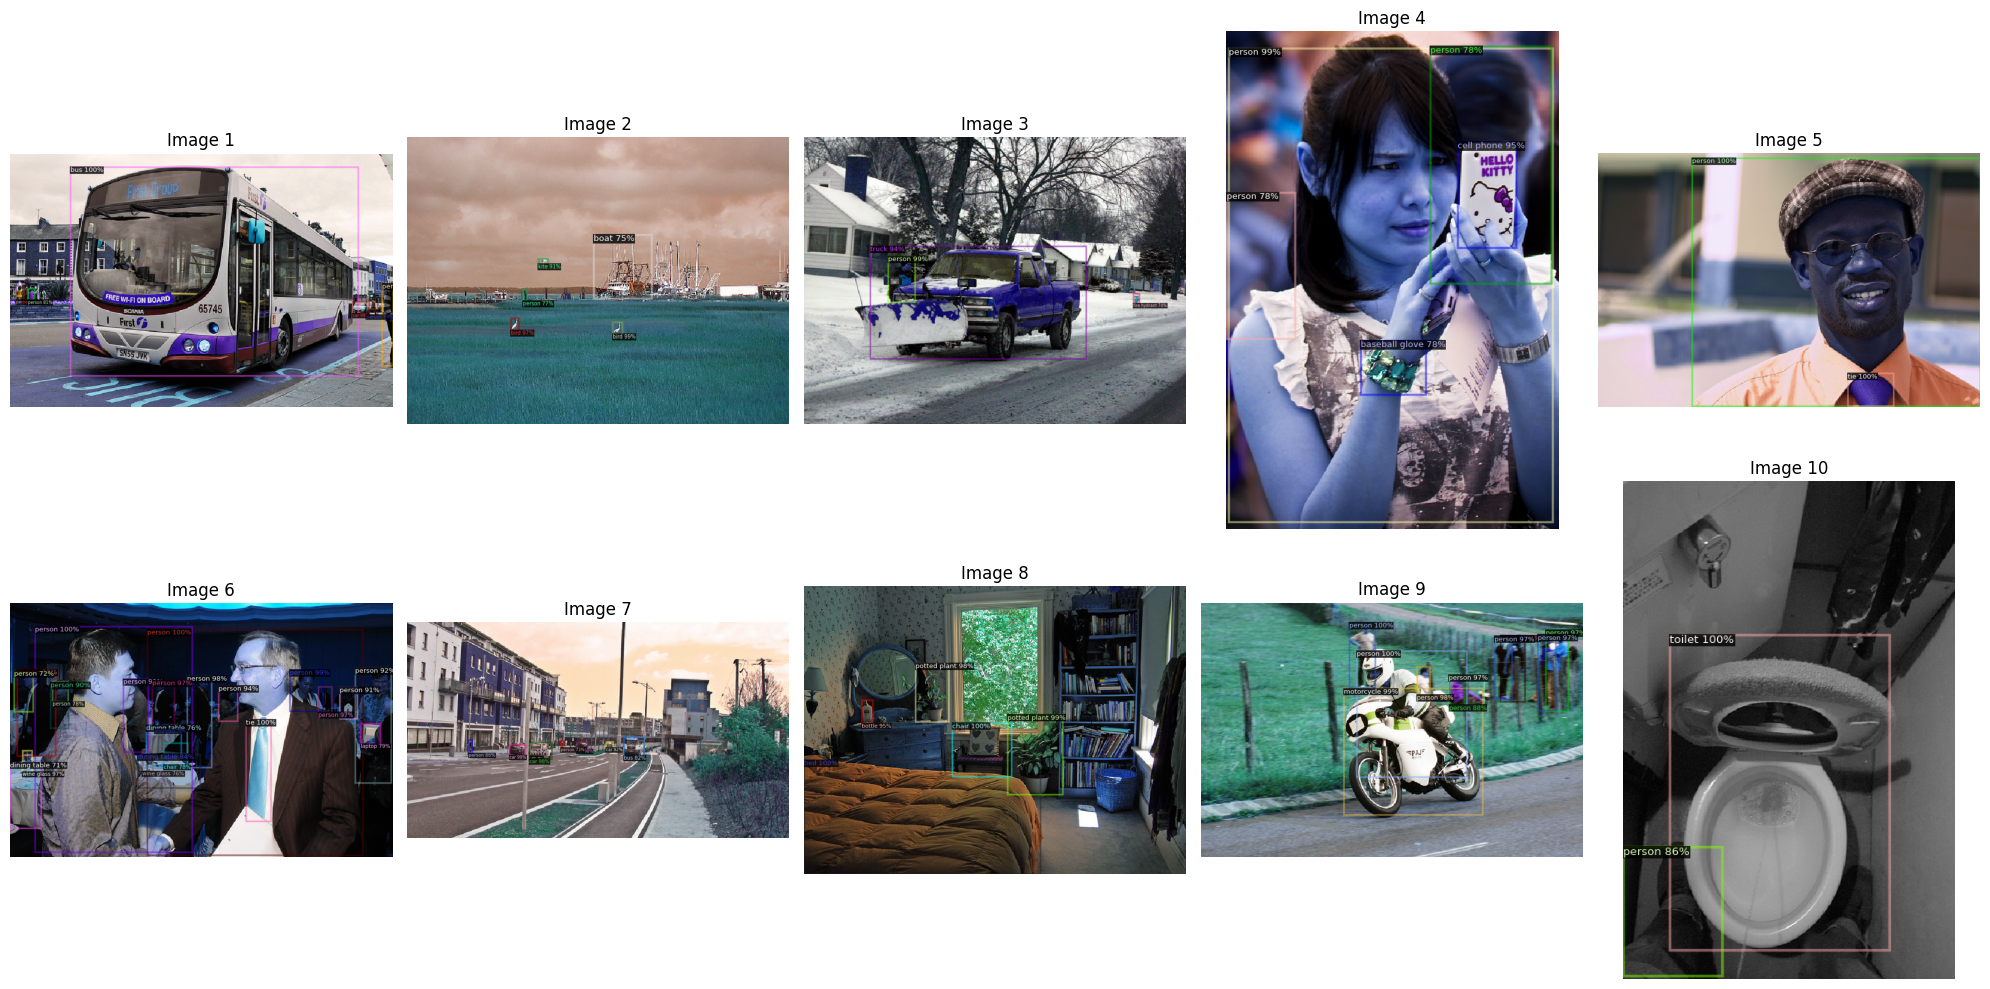

Đã lưu ảnh vào thư mục 'output_images'


In [23]:
# Tạo ánh xạ từ class ID sang tên thật của object trong COCO
category_dict = {cat['id']: cat['name'] for cat in categories}

# Chọn ngẫu nhiên 10 ảnh đã nhận diện để hiển thị với Visualizer
random_detected_images = random.sample(list(detected_objects.keys()), 10)

# Tạo thư mục để lưu ảnh nếu chưa tồn tại
output_folder = "output_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Hiển thị ảnh với bounding box bằng Visualizer và lưu ảnh
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, image_path in enumerate(random_detected_images):
    image = cv2.imread(image_path)
    
    # Chuyển BGR sang RGB để hiển thị đúng màu sắc
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Thực hiện nhận diện lại để lấy dữ liệu bounding box
    outputs = predictor(image)

    # Tạo đối tượng Visualizer để vẽ bounding boxes lên ảnh
    v = Visualizer(image_rgb, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    # Lấy ảnh đã vẽ
    result_image = v.get_image()[:, :, ::-1]

    # Lưu ảnh đã vẽ vào thư mục output
    output_image_path = os.path.join(output_folder, f"image_{idx+1}.jpg")
    cv2.imwrite(output_image_path, result_image)

    # Hiển thị ảnh trong lưới 2x5
    row, col = idx // 5, idx % 5
    axes[row, col].imshow(result_image)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Image {idx+1}")

plt.tight_layout()
plt.show()

print(f"Đã lưu ảnh vào thư mục '{output_folder}'")

In [21]:
print("File saved at:", os.path.abspath("detected_objects.csv"))

File saved at: C:\Users\admin\detected_objects.csv


In [22]:
print("File saved at:", os.path.abspath("detected_objects1.csv"))

File saved at: C:\Users\admin\detected_objects1.csv


In [24]:
import math

# Hàm tính khoảng cách giữa hai đối tượng (center A, center B)
def calculate_distance(center_A, center_B):
    return math.sqrt((center_A[0] - center_B[0])**2 + (center_A[1] - center_B[1])**2)

# Hàm xác định quan hệ giữa hai đối tượng dựa trên bounding box
def determine_relationship(obj1, obj2):
    # Lấy center của mỗi object (trung tâm)
    center_A = ((obj1["x1"] + obj1["x2"]) / 2, (obj1["y1"] + obj1["y2"]) / 2)
    center_B = ((obj2["x1"] + obj2["x2"]) / 2, (obj2["y1"] + obj2["y2"]) / 2)

    distance = calculate_distance(center_A, center_B)

    # Quan hệ "ON"
    if obj1["y1"] < obj2["y1"] and obj1["y2"] > obj2["y2"] and obj1["x1"] < obj2["x1"] and obj1["x2"] > obj2["x2"]:
        return "ON"
    # Quan hệ "NEXT_TO"
    elif abs(center_A[0] - center_B[0]) < 50 and abs(center_A[1] - center_B[1]) < 50:
        return "NEXT_TO"
    # Quan hệ "NEAR"
    elif distance < 100:
        return "NEAR"
    # Quan hệ "UNDER"
    elif obj1["y1"] > obj2["y2"] and obj1["x1"] < obj2["x2"] and obj1["x2"] > obj2["x1"]:
        return "UNDER"
    # Quan hệ "ABOVE"
    elif obj1["y2"] < obj2["y1"] and obj1["x1"] < obj2["x2"]:
        return "ABOVE"
    # Quan hệ "INSIDE"
    elif obj1["x1"] >= obj2["x1"] and obj1["x2"] <= obj2["x2"] and obj1["y1"] >= obj2["y1"] and obj1["y2"] <= obj2["y2"]:
        return "INSIDE"
    # Quan hệ "BEHIND"
    elif obj1["y1"] > obj2["y2"] and obj1["x1"] < obj2["x2"]:
        return "BEHIND"
    # Quan hệ "IN_FRONT_OF"
    elif obj1["y2"] < obj2["y1"] and obj1["x1"] < obj2["x2"]:
        return "IN_FRONT_OF"
    # Quan hệ "TO_THE_LEFT_OF"
    elif obj1["x2"] < obj2["x1"]:
        return "TO_THE_LEFT_OF"
    # Quan hệ "TO_THE_RIGHT_OF"
    elif obj1["x1"] > obj2["x2"]:
        return "TO_THE_RIGHT_OF"
    # Quan hệ "CLOSE_TO"
    elif distance < 100:
        return "CLOSE_TO"
    return None

# Load dữ liệu từ CSV
df_objects = pd.read_csv("detected_objects.csv")

# Tạo DataFrame lưu thông tin quan hệ giữa các object
relationships = []

# Tạo DataFrame lưu tên object quan hệ
objectname_relationships = []

# Duyệt qua tất cả các cặp object
for i in range(len(df_objects)):
    for j in range(i + 1, len(df_objects)):  # Không so sánh chính nó
        obj1 = df_objects.iloc[i]
        obj2 = df_objects.iloc[j]

        # Kiểm tra nếu hai object thuộc cùng một ảnh
        if obj1["image_path"] == obj2["image_path"]:
            relation = determine_relationship(obj1, obj2)
            if relation:
                # Thêm vào danh sách quan hệ (ID của objects)
                relationships.append({
                    "image_path": obj1["image_path"],
                    "object_1": obj1["object_class"],  # ID của object 1
                    "object_2": obj2["object_class"],  # ID của object 2
                    "relationship": relation
                })

                # Thêm vào danh sách quan hệ (Tên của objects)
                name_object1 = category_dict.get(obj1["object_class"], "Unknown")
                name_object2 = category_dict.get(obj2["object_class"], "Unknown")
                objectname_relationships.append({
                    "name_object1": name_object1,
                    "relationship": relation,
                    "name_object2": name_object2
                })

# Chuyển quan hệ vào DataFrame
df_relationships = pd.DataFrame(relationships)
df_objectname_relationships = pd.DataFrame(objectname_relationships)

# Lưu quan hệ vào file CSV
df_relationships.to_csv("object_relationships.csv", index=False)
df_objectname_relationships.to_csv("objectname_relationship.csv", index=False)

print("Đã lưu quan hệ giữa các object vào object_relationships.csv và objectname_relationship.csv")

Đã lưu quan hệ giữa các object vào object_relationships.csv và objectname_relationship.csv


In [25]:
print("File saved at:", os.path.abspath("object_relationships.csv"))
print("File saved at:", os.path.abspath("objectname_relationship.csv"))

File saved at: C:\Users\admin\object_relationships.csv
File saved at: C:\Users\admin\objectname_relationship.csv


In [26]:
from py2neo import Graph, Node, Relationship

# Kết nối đến Neo4j
graph = Graph("bolt://localhost:7687", auth=("neo4j", "12345678"))

# Xóa dữ liệu cũ trong Neo4j (nếu bạn muốn làm sạch database trước khi thêm dữ liệu mới)
graph.run("MATCH (n) DETACH DELETE n")

# Đọc dữ liệu từ CSV
df_objects = pd.read_csv("detected_objects.csv")
df_relationships = pd.read_csv("object_relationships.csv")

# Dictionary ánh xạ class_id -> tên object từ COCO dataset
category_dict = {cat['id']: cat['name'] for cat in categories}

In [27]:
# Tạo node cho các objects và kiểm tra trùng lặp
for _, row in df_objects.iterrows():
    object_name = category_dict.get(row["object_class"], f"Unknown_{row['object_class']}")

    # Kiểm tra nếu node đã tồn tại
    existing_node = graph.nodes.match("Object", name=object_name).first()

    if not existing_node:
        # Tạo node nếu chưa tồn tại
        node = Node("Object", 
                    name=object_name,  # Tên thực tế của object
                    class_id=row["object_class"], 
                    confidence=row["confidence"], 
                    x1=row["x1"], y1=row["y1"], x2=row["x2"], y2=row["y2"], 
                    image=row["image_path"])
        graph.create(node)  # Tạo node vào Neo4j
        print(f"Đã tạo node cho: {object_name}")
    else:
        print(f"Node đã tồn tại: {object_name}")

print("Đã thêm tất cả objects vào Neo4j với kiểm tra trùng lặp!")

# Tạo relationships giữa objects trong Neo4j
for _, row in df_relationships.iterrows():
    obj1_name = category_dict.get(row["object_1"], f"Unknown_{row['object_1']}")
    obj2_name = category_dict.get(row["object_2"], f"Unknown_{row['object_2']}")

    # Kiểm tra nếu các node đã tồn tại trong Neo4j
    obj1_node = graph.nodes.match("Object", name=obj1_name).first()
    obj2_node = graph.nodes.match("Object", name=obj2_name).first()

    if obj1_node and obj2_node:
        # Tạo relationship nếu cả 2 node đã tồn tại
        relationship = Relationship(obj1_node, row["relationship"], obj2_node)
        graph.create(relationship)
        print(f"Đã tạo relationship: {obj1_name} - {obj2_name}")
    else:
        print(f"Không tìm thấy một hoặc cả hai node: {obj1_name} và {obj2_name}")

print("Đã thêm relationships giữa objects vào Neo4j!")

Đã tạo node cho: broccoli
Đã tạo node cho: chair
Node đã tồn tại: broccoli
Đã tạo node cho: mouse
Đã tạo node cho: remote
Đã tạo node cho: tv
Đã tạo node cho: baseball bat
Node đã tồn tại: tv
Node đã tồn tại: chair
Node đã tồn tại: broccoli
Đã tạo node cho: hot dog
Đã tạo node cho: donut
Node đã tồn tại: hot dog
Đã tạo node cho: cow
Node đã tồn tại: broccoli
Đã tạo node cho: pizza
Node đã tồn tại: hot dog
Node đã tồn tại: hot dog
Node đã tồn tại: baseball bat
Đã tạo node cho: fire hydrant
Node đã tồn tại: fire hydrant
Đã tạo node cho: train
Đã tạo node cho: cell phone
Node đã tồn tại: cell phone
Đã tạo node cho: Unknown_30
Đã tạo node cho: Unknown_69
Node đã tồn tại: tv
Đã tạo node cho: tie
Đã tạo node cho: kite
Đã tạo node cho: Unknown_26
Node đã tồn tại: kite
Node đã tồn tại: Unknown_26
Node đã tồn tại: Unknown_26
Đã tạo node cho: parking meter
Đã tạo node cho: truck
Node đã tồn tại: Unknown_26
Đã tạo node cho: dining table
Đã tạo node cho: skis
Đã tạo node cho: orange
Đã tạo node ch

Đã tạo relationship: broccoli - donut
Đã tạo relationship: broccoli - hot dog
Đã tạo relationship: chair - broccoli
Đã tạo relationship: chair - mouse
Đã tạo relationship: chair - remote
Đã tạo relationship: chair - tv
Đã tạo relationship: chair - baseball bat
Đã tạo relationship: chair - tv
Đã tạo relationship: chair - chair
Đã tạo relationship: chair - broccoli
Đã tạo relationship: chair - hot dog
Đã tạo relationship: chair - donut
Đã tạo relationship: chair - hot dog
Đã tạo relationship: broccoli - mouse
Đã tạo relationship: broccoli - remote
Đã tạo relationship: broccoli - tv
Đã tạo relationship: broccoli - baseball bat
Đã tạo relationship: broccoli - tv
Đã tạo relationship: broccoli - chair
Đã tạo relationship: broccoli - broccoli
Đã tạo relationship: broccoli - hot dog
Đã tạo relationship: broccoli - donut
Đã tạo relationship: broccoli - hot dog
Đã tạo relationship: mouse - remote
Đã tạo relationship: mouse - tv
Đã tạo relationship: mouse - baseball bat
Đã tạo relationship: mouse

Đã tạo relationship: tennis racket - baseball glove
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: backpack - backpack
Đã tạo relationship: baseball glove - bottle
Đã tạo relationship: baseball glove - skat

Đã tạo relationship: baseball bat - baseball bat
Đã tạo relationship: baseball bat - remote
Đã tạo relationship: baseball bat - Unknown_68
Đã tạo relationship: baseball bat - skateboard
Đã tạo relationship: baseball bat - Unknown_45
Đã tạo relationship: baseball bat - Unknown_71
Đã tạo relationship: baseball bat - Unknown_45
Đã tạo relationship: baseball bat - remote
Đã tạo relationship: baseball bat - baseball bat
Đã tạo relationship: baseball bat - remote
Đã tạo relationship: baseball bat - Unknown_68
Đã tạo relationship: baseball bat - skateboard
Đã tạo relationship: baseball bat - Unknown_45
Đã tạo relationship: baseball bat - Unknown_71
Đã tạo relationship: baseball bat - Unknown_45
Đã tạo relationship: baseball bat - remote
Đã tạo relationship: baseball bat - remote
Đã tạo relationship: baseball bat - Unknown_68
Đã tạo relationship: baseball bat - skateboard
Đã tạo relationship: baseball bat - Unknown_45
Đã tạo relationship: baseball bat - Unknown_71
Đã tạo relationship: baseball

Đã tạo relationship: umbrella - umbrella
Đã tạo relationship: bicycle - bicycle
Đã tạo relationship: bicycle - umbrella
Đã tạo relationship: bicycle - zebra
Đã tạo relationship: bicycle - umbrella
Đã tạo relationship: zebra - umbrella
Đã thêm relationships giữa objects vào Neo4j!


In [28]:
# Hàm truy vấn dữ liệu từ Neo4j
def query_neo4j(query):
    result = graph.run(query)  # Thực thi truy vấn trên đối tượng `graph`
    return [record for record in result]  # Trả về kết quả dưới dạng danh sách các bản ghi

In [29]:
query = """
MATCH (a)
WHERE a.name = 'umbrella'
RETURN a
"""
umbrella_node = query_neo4j(query)
print(umbrella_node)

[Record({'a': Node('Object', class_id=28, confidence=0.9241483211517334, image='E:/Download/val2017/000000009891.jpg', name='umbrella', x1=168.740478515625, x2=304.7777099609375, y1=246.5220642089844, y2=406.4461059570313)})]


In [30]:
query = """
MATCH (b)
WHERE b.name = 'bicycle'
RETURN b
"""
bicycle_node = query_neo4j(query)
print(bicycle_node)

[Record({'b': Node('Object', class_id=2, confidence=0.9939362406730652, image='E:/Download/val2017/000000001532.jpg', name='bicycle', x1=0.7087766528129578, x2=115.221435546875, y1=377.7192077636719, y2=479.1136474609375)})]


In [31]:
query = """
MATCH (a)-[:NEXT_TO]->(b)
RETURN a.name AS object_a, b.name AS object_b
"""
relationships = query_neo4j(query)
print(relationships)

[Record({'object_a': 'broccoli', 'object_b': 'donut'}), Record({'object_a': 'broccoli', 'object_b': 'baseball glove'}), Record({'object_a': 'broccoli', 'object_b': 'broccoli'}), Record({'object_a': 'remote', 'object_b': 'hot dog'}), Record({'object_a': 'remote', 'object_b': 'remote'}), Record({'object_a': 'tv', 'object_b': 'tv'}), Record({'object_a': 'baseball bat', 'object_b': 'donut'}), Record({'object_a': 'baseball bat', 'object_b': 'skateboard'}), Record({'object_a': 'baseball bat', 'object_b': 'Unknown_45'}), Record({'object_a': 'baseball bat', 'object_b': 'baseball bat'}), Record({'object_a': 'donut', 'object_b': 'broccoli'}), Record({'object_a': 'donut', 'object_b': 'baseball glove'}), Record({'object_a': 'train', 'object_b': 'bicycle'}), Record({'object_a': 'Unknown_26', 'object_b': 'Unknown_26'}), Record({'object_a': 'sports ball', 'object_b': 'sports ball'}), Record({'object_a': 'couch', 'object_b': 'couch'}), Record({'object_a': 'Unknown_66', 'object_b': 'potted plant'}), Re

In [32]:
query = """
MATCH (a)-[:NEXT_TO]->(b)
WHERE a.name = 'bicycle' AND b.name = 'airplane'
RETURN a.name AS object_a, b.name AS object_b
"""
relationships = query_neo4j(query)
print(relationships)

[Record({'object_a': 'bicycle', 'object_b': 'airplane'})]


In [33]:
query_nodes = """
MATCH (n:Object)
RETURN n.name AS object_name, ID(n) AS node_id
"""
nodes = query_neo4j(query_nodes)
print(nodes)

[Record({'object_name': 'broccoli', 'node_id': 68}), Record({'object_name': 'chair', 'node_id': 69}), Record({'object_name': 'mouse', 'node_id': 70}), Record({'object_name': 'remote', 'node_id': 71}), Record({'object_name': 'tv', 'node_id': 72}), Record({'object_name': 'baseball bat', 'node_id': 73}), Record({'object_name': 'hot dog', 'node_id': 74}), Record({'object_name': 'donut', 'node_id': 75}), Record({'object_name': 'cow', 'node_id': 76}), Record({'object_name': 'pizza', 'node_id': 77}), Record({'object_name': 'fire hydrant', 'node_id': 78}), Record({'object_name': 'train', 'node_id': 79}), Record({'object_name': 'cell phone', 'node_id': 80}), Record({'object_name': 'Unknown_30', 'node_id': 81}), Record({'object_name': 'Unknown_69', 'node_id': 82}), Record({'object_name': 'tie', 'node_id': 83}), Record({'object_name': 'kite', 'node_id': 84}), Record({'object_name': 'Unknown_26', 'node_id': 85}), Record({'object_name': 'parking meter', 'node_id': 86}), Record({'object_name': 'truc

In [34]:
query_edges = """
MATCH (a:Object)-[:NEXT_TO]->(b:Object)
RETURN ID(a) AS node_a, ID(b) AS node_b
"""
edges = query_neo4j(query_edges)
print(edges)

[Record({'node_a': 68, 'node_b': 75}), Record({'node_a': 68, 'node_b': 103}), Record({'node_a': 68, 'node_b': 68}), Record({'node_a': 71, 'node_b': 74}), Record({'node_a': 71, 'node_b': 71}), Record({'node_a': 72, 'node_b': 72}), Record({'node_a': 73, 'node_b': 75}), Record({'node_a': 73, 'node_b': 106}), Record({'node_a': 73, 'node_b': 116}), Record({'node_a': 73, 'node_b': 73}), Record({'node_a': 75, 'node_b': 68}), Record({'node_a': 75, 'node_b': 103}), Record({'node_a': 79, 'node_b': 95}), Record({'node_a': 85, 'node_b': 85}), Record({'node_a': 91, 'node_b': 91}), Record({'node_a': 92, 'node_b': 92}), Record({'node_a': 93, 'node_b': 94}), Record({'node_a': 95, 'node_b': 96}), Record({'node_a': 95, 'node_b': 95}), Record({'node_a': 100, 'node_b': 100}), Record({'node_a': 103, 'node_b': 75}), Record({'node_a': 103, 'node_b': 115}), Record({'node_a': 103, 'node_b': 103}), Record({'node_a': 106, 'node_b': 75}), Record({'node_a': 106, 'node_b': 92}), Record({'node_a': 106, 'node_b': 103

In [35]:
query_node_features = """
MATCH (n:Object)
RETURN n.class_id AS class_id, n.confidence AS confidence
"""
node_features = query_neo4j(query_node_features)
print(node_features)

[Record({'class_id': 56, 'confidence': 0.9938883185386658}), Record({'class_id': 62, 'confidence': 0.9871870279312134}), Record({'class_id': 74, 'confidence': 0.9214431047439576}), Record({'class_id': 75, 'confidence': 0.9150474667549132}), Record({'class_id': 72, 'confidence': 0.9061191082000732}), Record({'class_id': 39, 'confidence': 0.8978105187416077}), Record({'class_id': 58, 'confidence': 0.8500964641571045}), Record({'class_id': 60, 'confidence': 0.771213710308075}), Record({'class_id': 21, 'confidence': 0.9884127974510192}), Record({'class_id': 59, 'confidence': 0.9953108429908752}), Record({'class_id': 11, 'confidence': 0.998207688331604}), Record({'class_id': 7, 'confidence': 0.819987952709198}), Record({'class_id': 77, 'confidence': 0.9760539531707764}), Record({'class_id': 30, 'confidence': 0.920877993106842}), Record({'class_id': 69, 'confidence': 0.9978263974189758}), Record({'class_id': 32, 'confidence': 0.7585177421569824}), Record({'class_id': 38, 'confidence': 0.9969

In [12]:
import torch
from torch_geometric.data import Data

In [36]:


# Chuyển đổi thuộc tính thành tensor
node_features_tensor = torch.tensor([[item['class_id'], item['confidence']] for item in node_features], dtype=torch.float)

# Chuyển đổi các cạnh từ danh sách edges thành tensor phù hợp với PyTorch Geometric
edge_index = torch.tensor([(edge['node_a'], edge['node_b']) for edge in edges], dtype=torch.long).t().contiguous()  # Chuyển đổi cạnh thành tensor và chuyển vị (transpose)

In [37]:
# Kiểm tra node_features_tensor
print("Node Features Tensor:")
print(node_features_tensor)

# Kiểm tra edge_index
print("Edge Index:")
print(edge_index)

Node Features Tensor:
tensor([[56.0000,  0.9939],
        [62.0000,  0.9872],
        [74.0000,  0.9214],
        [75.0000,  0.9150],
        [72.0000,  0.9061],
        [39.0000,  0.8978],
        [58.0000,  0.8501],
        [60.0000,  0.7712],
        [21.0000,  0.9884],
        [59.0000,  0.9953],
        [11.0000,  0.9982],
        [ 7.0000,  0.8200],
        [77.0000,  0.9761],
        [30.0000,  0.9209],
        [69.0000,  0.9978],
        [32.0000,  0.7585],
        [38.0000,  0.9969],
        [26.0000,  0.8910],
        [14.0000,  0.9932],
        [ 8.0000,  0.8715],
        [67.0000,  0.9543],
        [35.0000,  0.7804],
        [55.0000,  0.8731],
        [37.0000,  0.9486],
        [63.0000,  0.9992],
        [66.0000,  0.9916],
        [64.0000,  0.9916],
        [ 2.0000,  0.9939],
        [ 5.0000,  0.9988],
        [15.0000,  0.9397],
        [ 4.0000,  0.9992],
        [22.0000,  0.9906],
        [ 9.0000,  0.7525],
        [47.0000,  0.9618],
        [34.0000,  0.9769]

In [38]:
import torch
from torch_geometric.data import Data

# Tạo đồ thị cho PyTorch Geometric
data = Data(x=node_features_tensor, edge_index=edge_index)

# In thông tin đồ thị
print(data)

Data(x=[67, 2], edge_index=[2, 34])


In [39]:
# Kiểm tra lại shape của edge_index
print("Edge Index shape:", edge_index.shape)

# Nếu edge_index có shape (2, N), tiếp tục xử lý
if edge_index.dim() == 2 and edge_index.shape[0] == 2:
    # Giảm các giá trị node vượt quá 67 xuống giá trị hợp lệ
    edge_index_corrected = []
    for i in range(edge_index.shape[1]):  # Lặp qua tất cả các cạnh
        node_a = edge_index[0, i].item()
        node_b = edge_index[1, i].item()

        # Nếu node_a hoặc node_b vượt quá 67, thay thế chúng bằng 67
        if node_a >= 68:
            node_a = 67
        if node_b >= 68:
            node_b = 67

        edge_index_corrected.append((node_a, node_b))

    # Chuyển lại các cạnh hợp lệ thành tensor
    edge_index = torch.tensor(edge_index_corrected, dtype=torch.long).t().contiguous()

    # Kiểm tra lại edge_index đã sửa
    print("Corrected Edge Index shape:", edge_index.shape)
else:
    print("Edge index has an unexpected shape:", edge_index.shape)

Edge Index shape: torch.Size([2, 34])
Corrected Edge Index shape: torch.Size([2, 34])


In [13]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.data import Data

In [41]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.data import Data

class GNNModel(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, 64)  # Lớp GCN đầu tiên (2 đặc trưng vào, 64 đặc trưng ra)
        self.conv2 = GCNConv(64, out_channels)  # Lớp GCN thứ hai (64 đặc trưng vào, 2 đặc trưng ra)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index  # Lấy các đặc trưng và các cạnh
        x = self.conv1(x, edge_index)  # Áp dụng lớp GCN đầu tiên
        x = F.relu(x)  # Hàm kích hoạt ReLU
        x = self.conv2(x, edge_index)  # Áp dụng lớp GCN thứ hai
        return x

# Khởi tạo mô hình GNN và optimizer
in_channels = 2  # Số đặc trưng đầu vào cho mỗi node (vì bạn có 2 đặc trưng cho mỗi node)
out_channels = 2  # Kích thước của embedding đầu ra (ví dụ: 2 chiều)
model = GNNModel(in_channels=in_channels, out_channels=out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Giả sử bạn có 68 node và mỗi node có 2 lớp phân loại
# Tạo nhãn ngẫu nhiên cho 68 node (2 lớp: 0 và 1)
labels = torch.randint(0, 2, (data.x.shape[0],))  # Sử dụng số lượng node từ data.x

# Huấn luyện mô hình
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Tiến hành truyền dữ liệu qua mô hình
    
    # Kiểm tra kích thước của out và labels
    print(f"Output shape: {out.shape}, Labels shape: {labels.shape}")
    
    # Tính toán loss
    loss = F.cross_entropy(out, labels)  # Sử dụng cross_entropy cho phân loại
    loss.backward()  # Lan truyền ngược
    optimizer.step()  # Cập nhật trọng số
    
    print(f'Epoch {epoch+1}: Loss = {loss.item()}')

# Lấy embedding của các node
embedding = model(data)
print(embedding)

Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 1: Loss = 1.4042978286743164
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 2: Loss = 2.635187864303589
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 3: Loss = 1.5526537895202637
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 4: Loss = 0.9306774139404297
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 5: Loss = 1.5331189632415771
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 6: Loss = 1.4776898622512817
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 7: Loss = 0.9793270826339722
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 8: Loss = 0.7394564151763916
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 9: Loss = 1.1937754154205322
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 10: Loss = 1.0678597

Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 90: Loss = 0.660437285900116
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 91: Loss = 0.6603980660438538
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 92: Loss = 0.6602573394775391
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 93: Loss = 0.6603001356124878
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 94: Loss = 0.6601687073707581
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 95: Loss = 0.6601188778877258
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 96: Loss = 0.6600951552391052
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 97: Loss = 0.6599665284156799
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 98: Loss = 0.6599661707878113
Output shape: torch.Size([67, 2]), Labels shape: torch.Size([67])
Epoch 99: Loss = 

In [37]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.data import Data

class GNNModel(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, 64)  # Lớp GCN đầu tiên
        self.conv2 = GCNConv(64, out_channels)  # Lớp GCN thứ hai

    def forward(self, data):
        x, edge_index = data.x, data.edge_index  # Lấy các đặc trưng và các cạnh
        x = self.conv1(x, edge_index)  # Áp dụng lớp GCN đầu tiên
        x = F.relu(x)  # Hàm kích hoạt ReLU
        x = self.conv2(x, edge_index)  # Áp dụng lớp GCN thứ hai
        return x

# Khởi tạo mô hình GNN và optimizer
in_channels = 16  # Số đặc trưng đầu vào cho mỗi node
out_channels = 2  # Kích thước của embedding đầu ra (ví dụ: 2 chiều)
model = GNNModel(in_channels=in_channels, out_channels=out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Giả sử bạn có 68 node và mỗi node có 2 lớp phân loại
# Tạo nhãn ngẫu nhiên cho 68 node (2 lớp: 0 và 1)
labels = torch.randint(0, 2, (68,))  # Tạo nhãn ngẫu nhiên cho 68 node (2 lớp: 0 và 1)

# Tạo dữ liệu giả (để minh họa)
node_features_tensor = torch.rand(68, 16)  # 68 node, mỗi node có 16 đặc trưng ngẫu nhiên
edge_index = torch.tensor([(0, 1), (1, 2), (2, 3), (3, 0)], dtype=torch.long).t().contiguous()  # Mối quan hệ giữa các node

# Tạo đối tượng Data cho PyTorch Geometric
data = Data(x=node_features_tensor, edge_index=edge_index)

# Huấn luyện mô hình
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Tiến hành truyền dữ liệu qua mô hình
    
    # Kiểm tra kích thước của out và labels
    print(f"Output shape: {out.shape}, Labels shape: {labels.shape}")
    
    # Tính toán loss
    loss = F.cross_entropy(out, labels)  # Sử dụng cross_entropy cho phân loại
    loss.backward()  # Lan truyền ngược
    optimizer.step()  # Cập nhật trọng số
    
    print(f'Epoch {epoch+1}: Loss = {loss.item()}')

# Lấy embedding của các node
embedding = model(data)
print(embedding)

Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 1: Loss = 0.8530792593955994
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 2: Loss = 0.708888828754425
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 3: Loss = 0.7091999650001526
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 4: Loss = 0.7307248115539551
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 5: Loss = 0.714448869228363
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 6: Loss = 0.686074435710907
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 7: Loss = 0.6642741560935974
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 8: Loss = 0.6556719541549683
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 9: Loss = 0.6540520191192627
Output shape: torch.Size([68, 2]), Labels shape: torch.Size([68])
Epoch 10: Loss = 0.653419554

In [42]:
# Tính độ chính xác của mô hình
_, predicted = torch.max(out, 1)  # Lấy giá trị có xác suất cao nhất cho mỗi node
correct = (predicted == labels).sum().item()
accuracy = correct / labels.size(0)  # Tính độ chính xác
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5970


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Tính cosine similarity giữa các embedding
cosine_sim = cosine_similarity(embedding.detach().numpy())  # Chuyển embedding thành numpy array
print(cosine_sim)

[[0.9999999  0.9999968  0.9999752  ... 0.99394464 0.999776   0.9997762 ]
 [0.9999968  0.9999999  0.9999896  ... 0.9936675  0.9997201  0.99972034]
 [0.9999752  0.9999896  1.         ... 0.9931471  0.99960244 0.9996027 ]
 ...
 [0.99394464 0.9936675  0.9931471  ... 1.0000001  0.9960474  0.9960467 ]
 [0.999776   0.9997201  0.99960244 ... 0.9960474  1.         1.        ]
 [0.9997762  0.99972034 0.9996027  ... 0.9960467  1.         1.        ]]


In [44]:
from sklearn.cluster import KMeans

# Áp dụng K-means clustering trên các embedding của node
kmeans = KMeans(n_clusters=2, random_state=0).fit(embedding.detach().numpy())  # 2 là số cụm
labels_pred = kmeans.labels_
print(labels_pred)

C:\Users\admin\anaconda3\envs\coco_kg\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0]


In [47]:
# Tạo các đặc trưng ngẫu nhiên cho 67 node, mỗi node có 2 đặc trưng
new_node_features = torch.rand(67, 2)  # 67 node, mỗi node có 2 đặc trưng

# Tạo chỉ số các mối quan hệ giữa các node, đảm bảo các chỉ số không vượt quá 66
new_edge_index = torch.randint(0, 67, (2, 34), dtype=torch.long)  # 34 mối quan hệ ngẫu nhiên

In [48]:
# Khởi tạo lại mô hình với in_channels = 2 và out_channels = 2
in_channels = 2  # 2 đặc trưng đầu vào cho mỗi node
out_channels = 2  # Kích thước của embedding đầu ra (ví dụ: 2 chiều)
model = GNNModel(in_channels=in_channels, out_channels=out_channels)

# Chuyển mô hình sang chế độ đánh giá
model.eval()

# Tạo dữ liệu mới
new_data = Data(x=new_node_features, edge_index=new_edge_index)

# Dự báo embedding cho node mới
new_embeddings = model(new_data)
print(new_embeddings)

tensor([[ 3.4147e-02, -1.3810e-03],
        [ 3.0076e-03,  1.0553e-01],
        [ 3.1693e-02, -3.0371e-02],
        [ 7.5214e-02, -1.7386e-01],
        [ 3.6376e-03,  1.5812e-01],
        [ 3.5803e-02,  5.9097e-02],
        [ 6.1143e-02, -1.9358e-01],
        [ 5.8325e-02,  2.0495e-02],
        [-2.7211e-02,  1.2510e-01],
        [ 5.6993e-02, -2.8201e-02],
        [-3.1782e-02,  1.4559e-01],
        [ 4.3436e-02, -6.2010e-02],
        [ 1.5040e-02,  1.0767e-01],
        [ 1.0188e-02,  8.3622e-02],
        [ 5.7396e-02, -6.6096e-03],
        [ 3.6338e-02, -2.7862e-03],
        [ 5.5668e-02, -5.1982e-02],
        [ 2.6038e-02,  6.1666e-02],
        [ 5.7640e-02,  2.4153e-02],
        [ 6.1583e-02, -1.4233e-01],
        [ 9.1565e-02, -8.7441e-02],
        [ 3.3617e-02, -1.0827e-01],
        [ 1.3674e-02,  1.7638e-01],
        [ 3.3575e-02,  1.0050e-01],
        [ 6.2899e-02, -1.4792e-01],
        [-4.7531e-02,  2.4245e-01],
        [ 8.2853e-02, -1.4732e-01],
        [ 5.7123e-02, -2.088

In [49]:
# In thông tin đồ thị
print(new_data)

Data(x=[67, 2], edge_index=[2, 34])


In [50]:
# In embedding của các node mới
print(new_embeddings)

tensor([[ 3.4147e-02, -1.3810e-03],
        [ 3.0076e-03,  1.0553e-01],
        [ 3.1693e-02, -3.0371e-02],
        [ 7.5214e-02, -1.7386e-01],
        [ 3.6376e-03,  1.5812e-01],
        [ 3.5803e-02,  5.9097e-02],
        [ 6.1143e-02, -1.9358e-01],
        [ 5.8325e-02,  2.0495e-02],
        [-2.7211e-02,  1.2510e-01],
        [ 5.6993e-02, -2.8201e-02],
        [-3.1782e-02,  1.4559e-01],
        [ 4.3436e-02, -6.2010e-02],
        [ 1.5040e-02,  1.0767e-01],
        [ 1.0188e-02,  8.3622e-02],
        [ 5.7396e-02, -6.6096e-03],
        [ 3.6338e-02, -2.7862e-03],
        [ 5.5668e-02, -5.1982e-02],
        [ 2.6038e-02,  6.1666e-02],
        [ 5.7640e-02,  2.4153e-02],
        [ 6.1583e-02, -1.4233e-01],
        [ 9.1565e-02, -8.7441e-02],
        [ 3.3617e-02, -1.0827e-01],
        [ 1.3674e-02,  1.7638e-01],
        [ 3.3575e-02,  1.0050e-01],
        [ 6.2899e-02, -1.4792e-01],
        [-4.7531e-02,  2.4245e-01],
        [ 8.2853e-02, -1.4732e-01],
        [ 5.7123e-02, -2.088

In [51]:
# Lưu mô hình
torch.save(model.state_dict(), 'gnn_model.pth')

# Lưu embedding của các node
torch.save(embedding, 'node_embeddings.pth')

In [52]:
print("File saved at:", os.path.abspath("gnn_model.pth"))

File saved at: C:\Users\admin\gnn_model.pth


In [53]:
print("File saved at:", os.path.abspath("node_embeddings.pth"))

File saved at: C:\Users\admin\node_embeddings.pth


In [55]:
# Tải mô hình đã lưu
model = GNNModel(in_channels=2, out_channels=2)  # Thay thế 2 với số lớp bạn muốn
model.load_state_dict(torch.load('gnn_model.pth', weights_only=True))
model.eval()  # Chuyển mô hình sang chế độ đánh giá

GNNModel(
  (conv1): GCNConv(2, 64)
  (conv2): GCNConv(64, 2)
)

In [14]:
# Tải embedding của các node
node_embeddings = torch.load('node_embeddings.pth', weights_only=True)

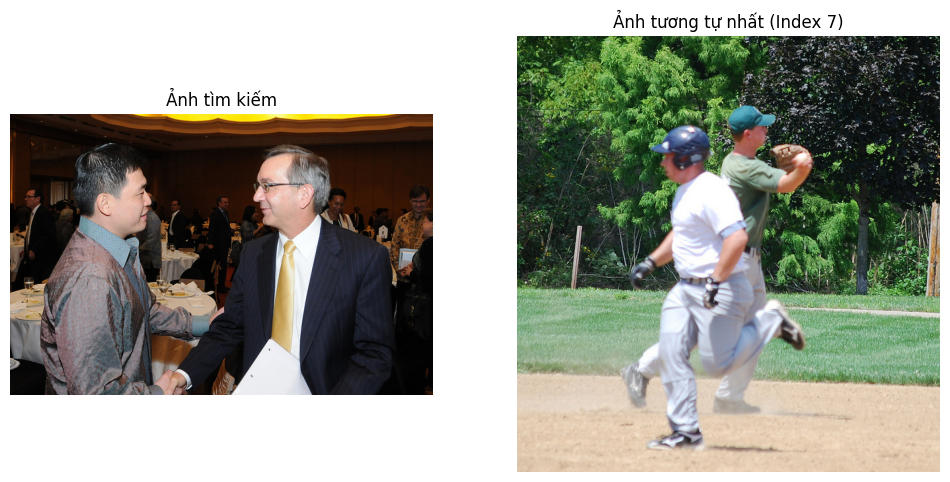

In [59]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Tải mô hình ResNet-18 với trọng số huấn luyện sẵn từ ImageNet
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet.eval()  # Chuyển mô hình sang chế độ đánh giá

# Định nghĩa phép biến đổi để đưa ảnh vào mô hình
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Thay đổi kích thước ảnh
    transforms.ToTensor(),  # Chuyển ảnh thành tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Chuẩn hóa ảnh
])

# Hàm trích xuất embedding từ ảnh
def extract_embedding(image_path):
    img = Image.open(image_path).convert("RGB")  # Mở ảnh
    img = transform(img).unsqueeze(0)  # Áp dụng biến đổi và thêm chiều batch
    with torch.no_grad():
        embedding = resnet(img)  # Trích xuất embedding từ mô hình ResNet
    return embedding.squeeze().numpy()  # Trả về embedding dưới dạng numpy array

# Trích xuất embedding của ảnh tìm kiếm
new_query_embedding = extract_embedding('E:/Download/000000004134.jpg')  # Thay bằng đường dẫn ảnh tìm kiếm

# Giả sử node_embeddings có kích thước (68, 1000) (ví dụ sử dụng ResNet18 với 1000 chiều)
node_embeddings = np.random.rand(68, 1000)  # 68 node, mỗi node có embedding 1000 chiều (sử dụng ResNet-18)

# Chuẩn hóa các embedding (có thể cải thiện kết quả)
new_query_embedding = new_query_embedding / np.linalg.norm(new_query_embedding)
node_embeddings = node_embeddings / np.linalg.norm(node_embeddings, axis=1, keepdims=True)

# Tính toán cosine similarity giữa embedding của ảnh tìm kiếm và các node embeddings
cosine_similarities = cosine_similarity(new_query_embedding.reshape(1, -1), node_embeddings)

# Tìm node tương tự nhất
most_similar_index = cosine_similarities.argmax()  # Lấy chỉ số của node có độ tương đồng cao nhất

# Lấy danh sách đường dẫn ảnh trong thư mục
image_folder = "E:/Download/val2017/"
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith('.jpg')]  # Lọc chỉ ảnh .jpg

# Đảm bảo chỉ số không vượt quá phạm vi của danh sách ảnh
if most_similar_index < len(image_paths):
    most_similar_image_path = image_paths[most_similar_index]  # Lấy đường dẫn ảnh tương tự nhất
    most_similar_image = Image.open(most_similar_image_path)  # Mở ảnh
    query_image = Image.open('E:/Download/000000004134.jpg')  # Mở ảnh tìm kiếm
    
    # Hiển thị ảnh song song
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Tạo đồ thị với 2 cột
    axes[0].imshow(query_image)  # Hiển thị ảnh tìm kiếm
    axes[0].set_title("Ảnh tìm kiếm")
    axes[0].axis('off')  # Tắt hiển thị trục

    axes[1].imshow(most_similar_image)  # Hiển thị ảnh tương tự
    axes[1].set_title(f"Ảnh tương tự nhất (Index {most_similar_index})")
    axes[1].axis('off')  # Tắt hiển thị trục

    plt.show()  # Hiển thị đồ thị
else:
    print("Chỉ số ảnh không hợp lệ")

In [63]:
import networkx as nx
from pycocotools.coco import COCO
from networkx.algorithms.isomorphism import GraphMatcher

# 1. Tải dữ liệu COCO (Dữ liệu đối tượng và mối quan hệ)
annFile = 'E:/Download/annotations/instances_val2017.json'  # Đảm bảo rằng bạn đã có đường dẫn chính xác đến file này
coco = COCO(annFile)

# 2. Lấy danh sách hình ảnh và các đối tượng của chúng
image_ids = coco.getImgIds()
image_info = coco.loadImgs(image_ids)

# 3. Tạo đồ thị cho các đối tượng trong COCO
def create_graph_for_image(image_id):
    G = nx.Graph()  # Tạo một đồ thị rỗng

    # Lấy thông tin về đối tượng trong ảnh
    ann_ids = coco.getAnnIds(imgIds=image_id)
    anns = coco.loadAnns(ann_ids)

    # Thêm các đối tượng vào đồ thị
    for ann in anns:
        obj_id = ann['id']
        class_name = coco.loadCats(ann['category_id'])[0]['name']  # Tên lớp đối tượng
        bbox = ann['bbox']
        G.add_node(obj_id, class_name=class_name, bbox=bbox)  # Đổi 'class' thành 'class_name'

        # Thêm mối quan hệ giữa các đối tượng (ví dụ: NEXT_TO)
        for other_ann in anns:
            if other_ann['id'] != obj_id:
                G.add_edge(obj_id, other_ann['id'], relationship='NEXT_TO')
    
    return G

# 4. Tạo đồ thị mẫu (graph mẫu) và đồ thị của ảnh (graph tìm kiếm)
image_id = image_ids[0]  # Chọn một ảnh từ bộ dữ liệu COCO
sample_graph = create_graph_for_image(image_id)  # Đồ thị mẫu từ ảnh COCO

# 5. Đồ thị con mẫu (subgraph) - Đồ thị bạn muốn so khớp
subgraph_data = {
    1: {'class_name': 'person', 'bbox': [100, 200, 50, 70]},
    2: {'class_name': 'car', 'bbox': [300, 400, 60, 80]},
}

subgraph = nx.Graph()
for node_id, data in subgraph_data.items():
    subgraph.add_node(node_id, **data)
subgraph.add_edge(1, 2, relationship='NEXT_TO')

# 6. Sử dụng VF2 Algorithm để kiểm tra đồ thị con
matcher = GraphMatcher(sample_graph, subgraph)

# Kiểm tra đồ thị con có khớp với đồ thị mẫu
if matcher.is_isomorphic():
    print("Đồ thị con đã được tìm thấy trong đồ thị mẫu.")
else:
    print("Không tìm thấy đồ thị con trong đồ thị mẫu.")

loading annotations into memory...
Done (t=1.97s)
creating index...
index created!
Không tìm thấy đồ thị con trong đồ thị mẫu.


In [2]:
import networkx as nx
from pycocotools.coco import COCO
from networkx.algorithms.isomorphism import GraphMatcher

# 1. Tải dữ liệu COCO
annFile = 'E:/Download/annotations/instances_val2017.json'  # Đường dẫn tới annotation file
coco = COCO(annFile)

# 2. Hàm tạo đồ thị từ một ảnh COCO
def create_graph_for_image(image_id):
    G = nx.Graph()
    ann_ids = coco.getAnnIds(imgIds=image_id)
    anns = coco.loadAnns(ann_ids)

    for ann in anns:
        obj_id = ann['id']
        class_name = coco.loadCats(ann['category_id'])[0]['name']
        bbox = ann['bbox']
        G.add_node(obj_id, class_name=class_name, bbox=bbox)

        for other_ann in anns:
            if other_ann['id'] != obj_id:
                G.add_edge(obj_id, other_ann['id'], relationship='NEXT_TO')
    
    return G

# 3. Chọn 2 ảnh: 1 ảnh làm mẫu, 1 ảnh để tìm kiếm
image_ids = coco.getImgIds()

# Giả sử dùng ảnh đầu tiên làm ảnh mẫu (subgraph), ảnh thứ hai làm ảnh tìm kiếm
image_id_subgraph = image_ids[10]
image_id_target = image_ids[15]

# 4. Tạo đồ thị mẫu (subgraph) và đồ thị ảnh mục tiêu
subgraph = create_graph_for_image(image_id_subgraph)
target_graph = create_graph_for_image(image_id_target)

# 5. Dùng VF2 để kiểm tra subgraph có nằm trong target_graph không
def node_match(n1_attrs, n2_attrs):
    return n1_attrs['class_name'] == n2_attrs['class_name']

def edge_match(e1_attrs, e2_attrs):
    return e1_attrs['relationship'] == e2_attrs['relationship']

matcher = GraphMatcher(target_graph, subgraph, node_match=node_match, edge_match=edge_match)

if matcher.subgraph_is_isomorphic():
    print("Đồ thị mẫu đã được tìm thấy trong ảnh mục tiêu.")
else:
    print("Không tìm thấy đồ thị mẫu trong ảnh mục tiêu.")

loading annotations into memory...
Done (t=1.81s)
creating index...
index created!
Không tìm thấy đồ thị mẫu trong ảnh mục tiêu.


In [1]:
import numpy as np

# Tính Precision@K
def precision_at_k(relevant, retrieved, k):
    retrieved_k = retrieved[:k]
    relevant_retrieved = len(set(retrieved_k) & set(relevant))
    return relevant_retrieved / k

# Tính Recall@K
def recall_at_k(relevant, retrieved, k):
    retrieved_k = retrieved[:k]
    relevant_retrieved = len(set(retrieved_k) & set(relevant))
    return relevant_retrieved / len(relevant)

# Tính Average Precision (AP) cho một truy vấn
def average_precision(relevant, retrieved):
    precision_values = []
    num_relevant_retrieved = 0

    for i, img_id in enumerate(retrieved):
        if img_id in relevant:
            num_relevant_retrieved += 1
            precision = num_relevant_retrieved / (i + 1)
            precision_values.append(precision)

    if not precision_values:
        return 0.0
    return np.mean(precision_values)

# Tính Mean Average Precision (mAP) cho toàn bộ truy vấn
def mean_average_precision(queries, ground_truth, retrieval_results):
    APs = []
    for query_id in queries:
        AP = average_precision(ground_truth[query_id], retrieval_results[query_id])
        APs.append(AP)
    return np.mean(APs)

In [2]:
# Giả sử có danh sách ground-truth ảnh liên quan cho từng truy vấn
ground_truth = {
    "query_1": [101, 102, 103, 104],
    "query_2": [201, 202, 203, 204],
    "query_3": [301, 302, 303, 304]
}

# Kết quả truy vấn từ từng thuật toán (ảnh ID trong top 10)
retrieved_images = {
    "GNN": {
        "query_1": [101, 105, 102, 106, 107, 108, 109, 110],
        "query_2": [201, 205, 206, 207, 202, 208, 209, 210],
        "query_3": [301, 305, 302, 306, 307, 308, 309, 310]
    },
    "TransE": {
        "query_1": [101, 102, 105, 106, 103, 108, 109, 110],
        "query_2": [201, 202, 205, 203, 206, 207, 209, 210],
        "query_3": [301, 303, 305, 306, 302, 308, 309, 310]
    },
    "SIFT": {
        "query_1": [102, 105, 106, 101, 108, 109, 110, 111],
        "query_2": [202, 205, 201, 207, 209, 203, 210, 211],
        "query_3": [302, 303, 305, 301, 306, 308, 309, 310]
    },
    "BoVW": {
        "query_1": [105, 106, 107, 108, 101, 102, 109, 110],
        "query_2": [205, 206, 207, 209, 201, 202, 208, 210],
        "query_3": [305, 306, 307, 308, 301, 302, 309, 310]
    }
}

In [3]:
K = 5  # Số ảnh top-K để đánh giá

performance_metrics = {}

for method, results in retrieved_images.items():
    precision_scores = []
    recall_scores = []
    AP_scores = []

    for query_id in ground_truth.keys():
        precision_scores.append(precision_at_k(ground_truth[query_id], results[query_id], K))
        recall_scores.append(recall_at_k(ground_truth[query_id], results[query_id], K))
        AP_scores.append(average_precision(ground_truth[query_id], results[query_id]))

    performance_metrics[method] = {
        "Precision@K": np.mean(precision_scores),
        "Recall@K": np.mean(recall_scores),
        "mAP": np.mean(AP_scores)
    }

# Hiển thị kết quả
import pandas as pd
df_metrics = pd.DataFrame(performance_metrics).T
print(df_metrics)

        Precision@K  Recall@K       mAP
GNN        0.400000  0.500000  0.788889
TransE     0.600000  0.750000  0.883333
SIFT       0.466667  0.583333  0.796296
BoVW       0.200000  0.250000  0.266667


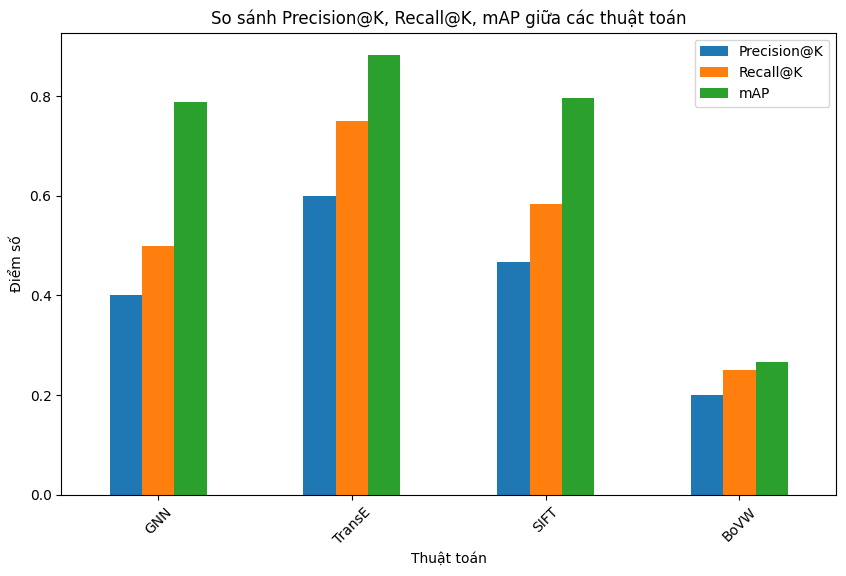

In [4]:
import matplotlib.pyplot as plt

def plot_metrics(df_metrics):
    df_metrics.plot(kind='bar', figsize=(10,6))
    plt.xlabel("Thuật toán")
    plt.ylabel("Điểm số")
    plt.title("So sánh Precision@K, Recall@K, mAP giữa các thuật toán")
    plt.xticks(rotation=45)
    plt.legend(["Precision@K", "Recall@K", "mAP"])
    plt.show()

plot_metrics(df_metrics)